# CBE 562 Homework 2

#### Tyson Wheelwright

## Problem 1

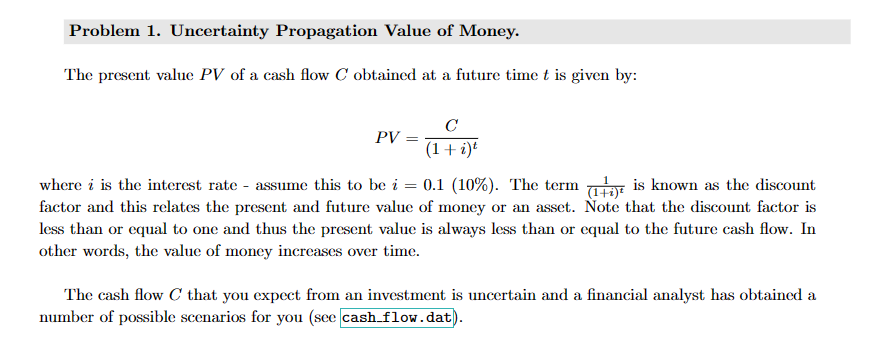

### imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### load data

In [2]:
df = pd.read_csv('../Matlab/Data/cash_flow.dat', delimiter='\s+', header=None, names=['cash_flow'])
cash_flow = df['cash_flow'].values

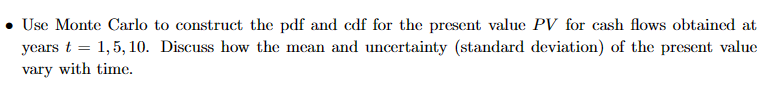

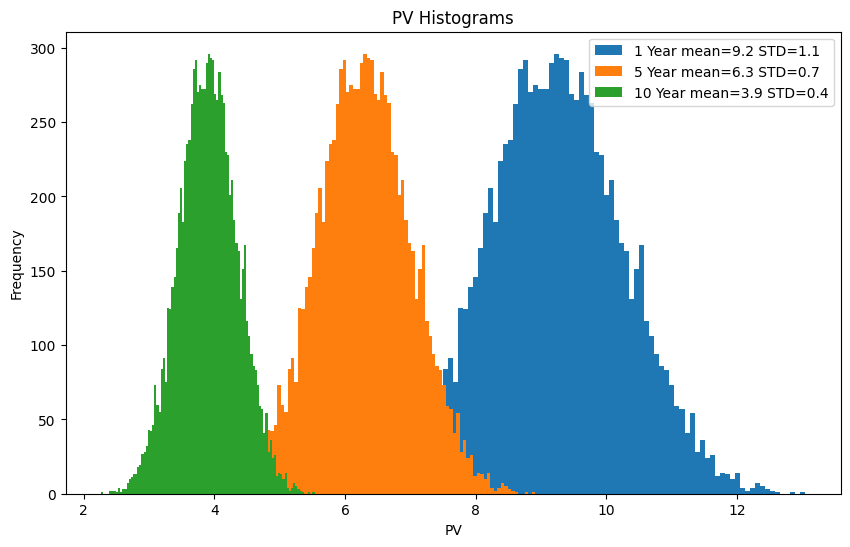

In [15]:
I = 0.1
sim_numb = 10000
monte_cash_flows = np.random.normal(cash_flow.mean(), cash_flow.std(), sim_numb)

# Construct empty array to store PV values:


# Define PV Function:
def cal_pv(I, t):
    final_pvs = np.zeros(sim_numb)
    for i, c in enumerate(monte_cash_flows):
        pv = c / (1 + I)**t
        final_pvs[i] = pv
    return final_pvs

# Calculate PVs for each cash flow [1,5,10]
pv_1 = cal_pv(I, 1)
pv_5 = cal_pv(I, 5)
pv_10 = cal_pv(I, 10)

# Calculate mean and std for each PV
pv_1_mean = np.mean(pv_1)
pv_1_std = np.std(pv_1)
pv_5_mean = np.mean(pv_5)
pv_5_std = np.std(pv_5)
pv_10_mean = np.mean(pv_10)
pv_10_std = np.std(pv_10)

# Plot each of the PVs to compare timepoints
plt.figure(figsize=(10, 6))
plt.hist(pv_1, bins=100, label=f'1 Year mean={pv_1_mean:.1f} STD={pv_1_std:.1f}')
plt.hist(pv_5, bins=100, label=f'5 Year mean={pv_5_mean:.1f} STD={pv_5_std:.1f}')
plt.hist(pv_10, bins=100, label=f'10 Year mean={pv_10_mean:.1f} STD={pv_10_std:.1f}')
plt.legend()
plt.title('PV Histograms')
plt.xlabel('PV')
plt.ylabel('Frequency')
plt.show()

The mean goes down with time, but the uncertianty increases.   
Which actually makes sense.

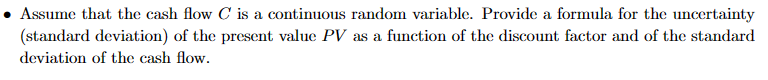

In [ ]:
# discount_factor = 1/((1+I)^t)
# sigma_pv = cash_flow.std * discount_factor

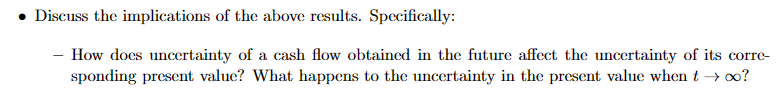

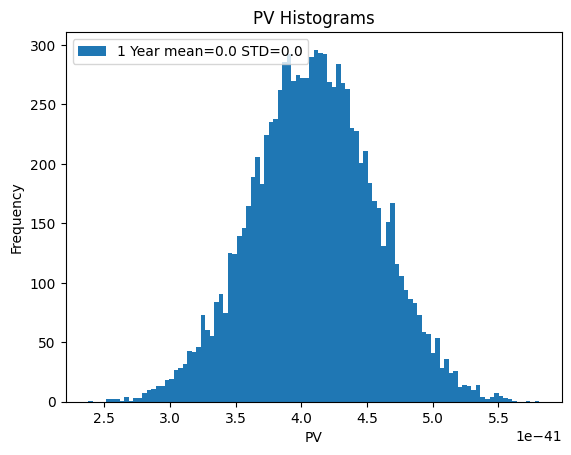

In [121]:
pv_big = cal_pv(I, 1000)
pv_big_mean = np.mean(pv_big)
pv_big_std = np.std(pv_big)
plt.hist(pv_big, bins=100, label=f'1 Year mean={pv_big_mean:.1f} STD={pv_big_std:.1f}')
plt.legend()
plt.title('PV Histograms')
plt.xlabel('PV')
plt.ylabel('Frequency')
plt.show()

The present value goes to like 0....? What?

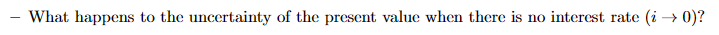

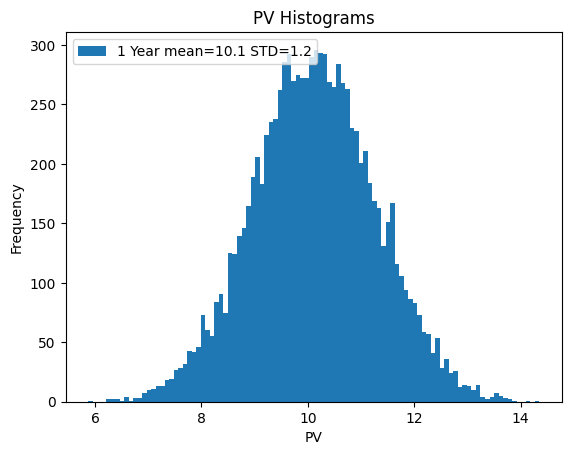

In [123]:
I = 0
pv_zero = cal_pv(I, 10)
pv_zero_mean = np.mean(pv_zero)
pv_zero_std = np.std(pv_zero)
plt.hist(pv_zero, bins=100, label=f'1 Year mean={pv_zero_mean:.1f} STD={pv_zero_std:.1f}')
plt.legend()
plt.title('PV Histograms')
plt.xlabel('PV')
plt.ylabel('Frequency')
plt.show()

It looks like it goes up!

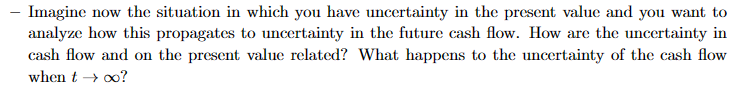

Uncertaintiy is higher in the present but if you have more time, then it also drops to 0

## Problem 2

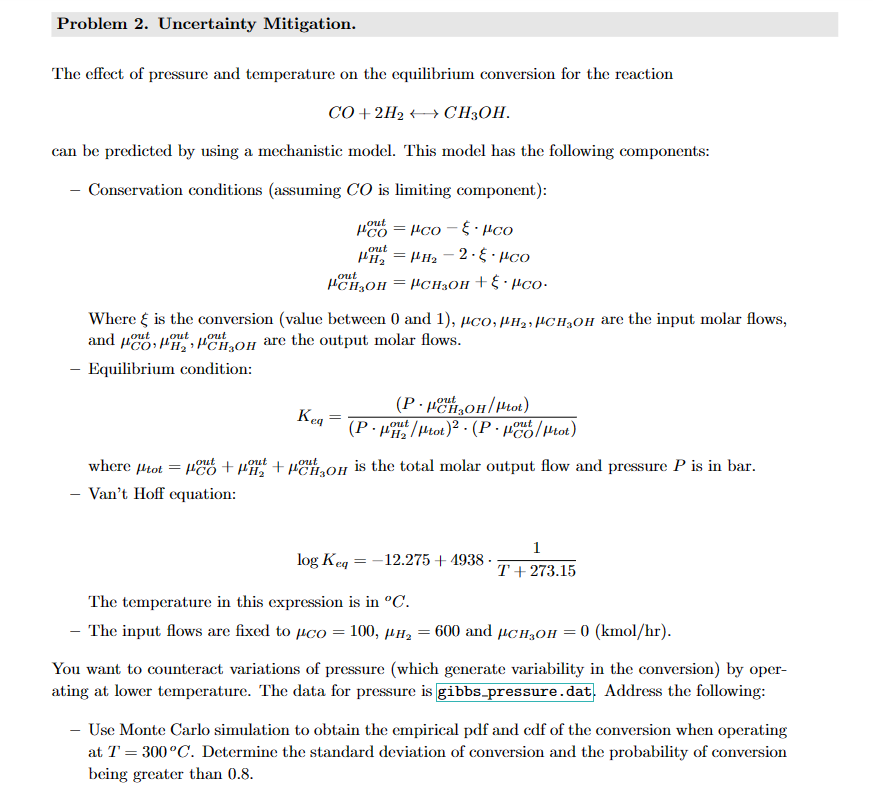

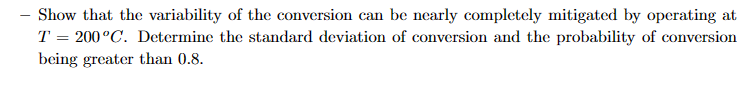

### load data

In [46]:
df1 = pd.read_csv('../Matlab/Data/gibbs_pressure.dat', delimiter='\s+', header=None, names=['pressure'])
print(10**(-3.66))

0.00021877616239495518


In [116]:
from scipy.optimize import fsolve

mu_CO = 100 
mu_H2 = 600 
mu_CH3OH = 0 

# define function for fsolve 
def equations(x, *args):

    # unpack variables 
    xi = x[0] 
    mu_CO_out = x[1] 
    mu_H2_out = x[2] 
    mu_CH3OH_out = x[3] 
    mu_tot = x[4]

    # unpack args
    T, P = args 
    Keq = 10**(-12.275 + 4948*(1/(T+273.15))) 

    eqn1 = mu_CO - xi*mu_CO - mu_CO_out
    eqn2 = mu_H2 - 2*xi*mu_CO  - mu_H2_out
    eqn3 = mu_CH3OH + xi*mu_CO - mu_CH3OH_out 
    eqn4 = (P*mu_CH3OH_out / mu_tot) / ((P*mu_H2_out / mu_tot)**2 * (P*mu_CO_out / mu_tot)) - Keq   
    eqn5 = mu_CO_out + mu_H2_out + mu_CH3OH_out - mu_tot
    eqns = [eqn1, eqn2, eqn3, eqn4, eqn5]
    return eqns 


def solv_for_xis(T, P):
    # define initial guesses
    final_xis = np.zeros(len(P))

    for i, p in enumerate(P):
        xi = 0.5
        mu_CO_out = 50
        mu_H2_out = 400
        mu_CH3OH_out = 250
        mu_tot = 700
        x0 = [xi, mu_CO_out, mu_H2_out, mu_CH3OH_out, mu_tot]
        sol = fsolve(equations, x0, args=(T, p))
        final_xis[i] = sol[0]
    return final_xis


sim_numb = 10000
pressure_samples = df1['pressure'].values
P_monte = np.random.normal(pressure_samples.mean(), pressure_samples.std(), sim_numb)

T = 300
final_xis_300 = solv_for_xis(300, P_monte)
T = 200
final_xis_200 = solv_for_xis(200, P_monte)
# final_xis = solv_for_xis(T, pressure_samples)

conv_std_300 = np.std(final_xis_300)
conv_std_200 = np.std(final_xis_200)
greater_than_8_300 = np.sum(final_xis_300 > 0.8) / len(final_xis_300)
greater_than_8_200 = np.sum(final_xis_200 > 0.8) / len(final_xis_200)

c:\Users\guy\Documents\StatsBook-master\py10venv\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\guy\Documents\StatsBook-master\py10venv\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


### plots

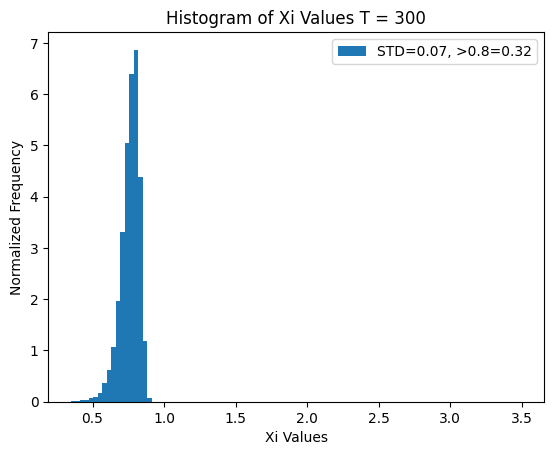

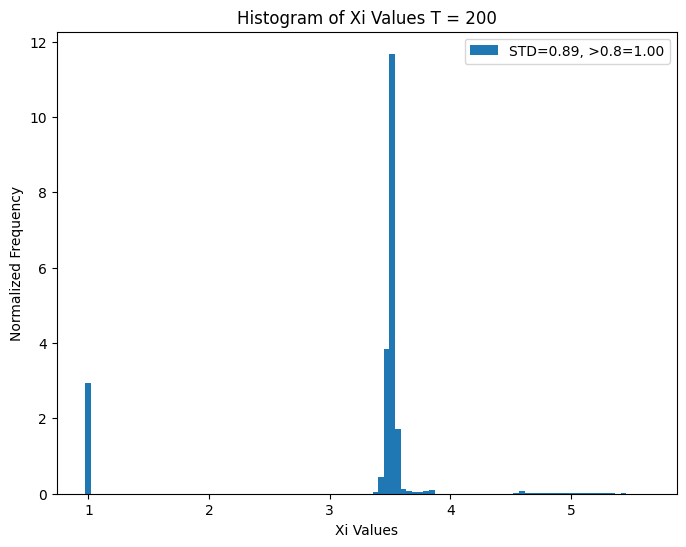

In [115]:
plt.hist(final_xis_300, bins=100, density=True, label=f'STD={conv_std_300:.2f}, >0.8={greater_than_8_300:.2f}')
plt.xlabel('Xi Values')
plt.ylabel('Normalized Frequency')
plt.title('Histogram of Xi Values T = 300')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(final_xis_200, bins=100, density=True, label=f'STD={conv_std_200:.2f}, >0.8={greater_than_8_200:.2f}')
plt.xlabel('Xi Values')
plt.ylabel('Normalized Frequency')
plt.title('Histogram of Xi Values T = 200')
plt.legend()
plt.show()

Thanks for grading. I hope you have a good night or day or whatever it is.